In [282]:
class Value:

  def __init__(self,data,_children=(),label = "",op=""):
    self.data = data
    self._prev = set(_children)
    self.label = label
    self._op = op
    self.grad = 0.0
    self._backward = lambda: None



  def __add__(self,other):
    other = Value(other) if not isinstance(other,Value) else other
    out =  Value(self.data + other.data,(self,other),op="+")

    def _backward():
      self.grad += out.grad
      other.grad +=  out.grad
      
    out._backward = _backward

    return out
  

  def __mul__(self,other):
    other = Value(other) if not isinstance(other,Value) else other
    out =  Value(self.data*other.data, (self,other),op = "*")

    def _backward():
      self.grad += other.data * out.grad
      out.grad += self.data * out.grad
    
    out._backward = _backward
  
    return out
  def __pow__(self,other):
    return Value(self.data ** other,(self,),f'**{other}')
  
  def __neg__(self): # -self
      return self * -1
  
  def __sub__(self,other):
    return self + (-other)
  
  def __rsub__(self,other):
    return other + (-self)
  
  def __truediv__(self,other):

    return self*other**-1
  
  def __rtruediv__(self,other):
    return other * self**-1
  

  __radd__ = __add__
  __rmul__ = __mul__

  def backward(self):
    

  
  def __repr__(self):
    return f"Value(data={self.data},grad={self.grad})"

In [283]:
#Structure the flow
import graphviz

def draw_dot(vertex):
    all_nodes,edges = list(),set()

    def get_all_nodes(vertex):
        if vertex not in all_nodes:
            all_nodes.append(vertex)
            for child in vertex._prev:
                edges.add((child,vertex))
                get_all_nodes(child)

        return all_nodes,edges
    nodes,edges = get_all_nodes(vertex)
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')
    dot.attr('node',shape ='record')
    for i in nodes:
        dot.node(name = str(id(i)),label="{%s |Data %.4f | Grad %.4f}" % (i.label,i.data,i.grad))
        if i._op:
            dot.node(name = str(id(i))+i._op,label=i._op,shape ='circle')
            dot.edge(str(id(i))+i._op ,str(id(i)) )
    for i,k in edges:
        dot.edge(str(id(i)),str(id(k))+k._op)
    return dot


In [284]:
# now create some function and I want to show the computation graph for the same

a = Value(2.0, label = 'a')
b = Value(-3.0 , label= 'b')
c = Value(10.0, label='c')
e = a*b ; e.label ='e'
d = e + c;d.label = 'd'
f = Value(-2,label='f')
L = d*f; L.label ='L'



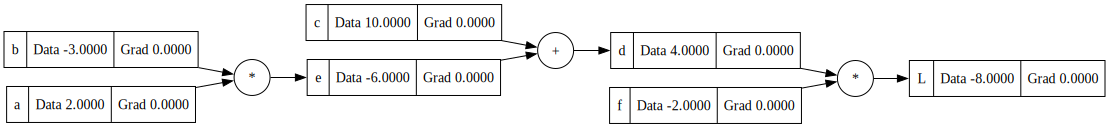

In [254]:
draw_dot(L)

In [ ]:
"""

dL/dL = 1

d*f = L

dd/dL = d/dd *dd/dL

"""